In [1]:
!pip install scikit-learn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:xlabel='longitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='longitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='longitude'>,
        <AxesSubplot:xlabel='population', ylabel='longitude'>,
        <AxesSubplot:xlabel='households', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_income', ylabel='longitude'>,
        <AxesSubplot:xlabel='median_house_value', ylabel='longitude'>],
       [<AxesSubplot:xlabel='longitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='latitude', ylabel='latitude'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='total_bedrooms', ylabel='latitude'>,
        <AxesSubplot:xlabel='population', ylabel='latitude'>,
        <AxesSubplot:xlabel='

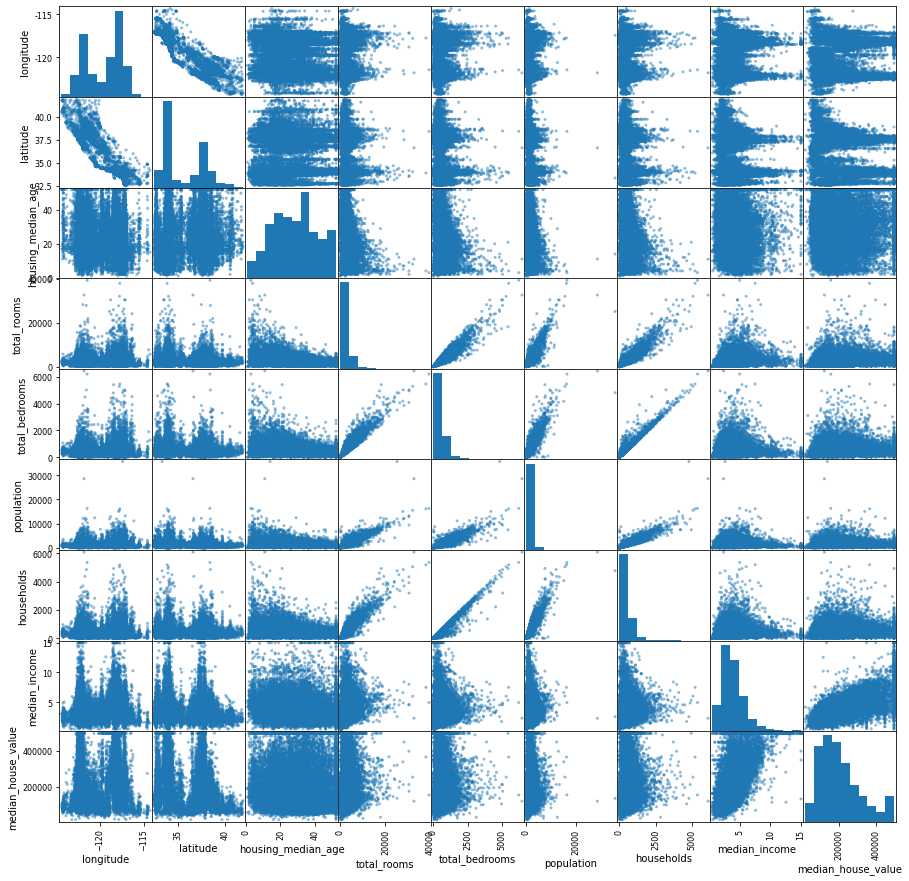

In [8]:
from pandas.plotting import scatter_matrix

num_columns = ['longitude', 'latitude','housing_median_age', 'total_rooms',
'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

scatter_matrix(df[num_columns], figsize=(15, 15))

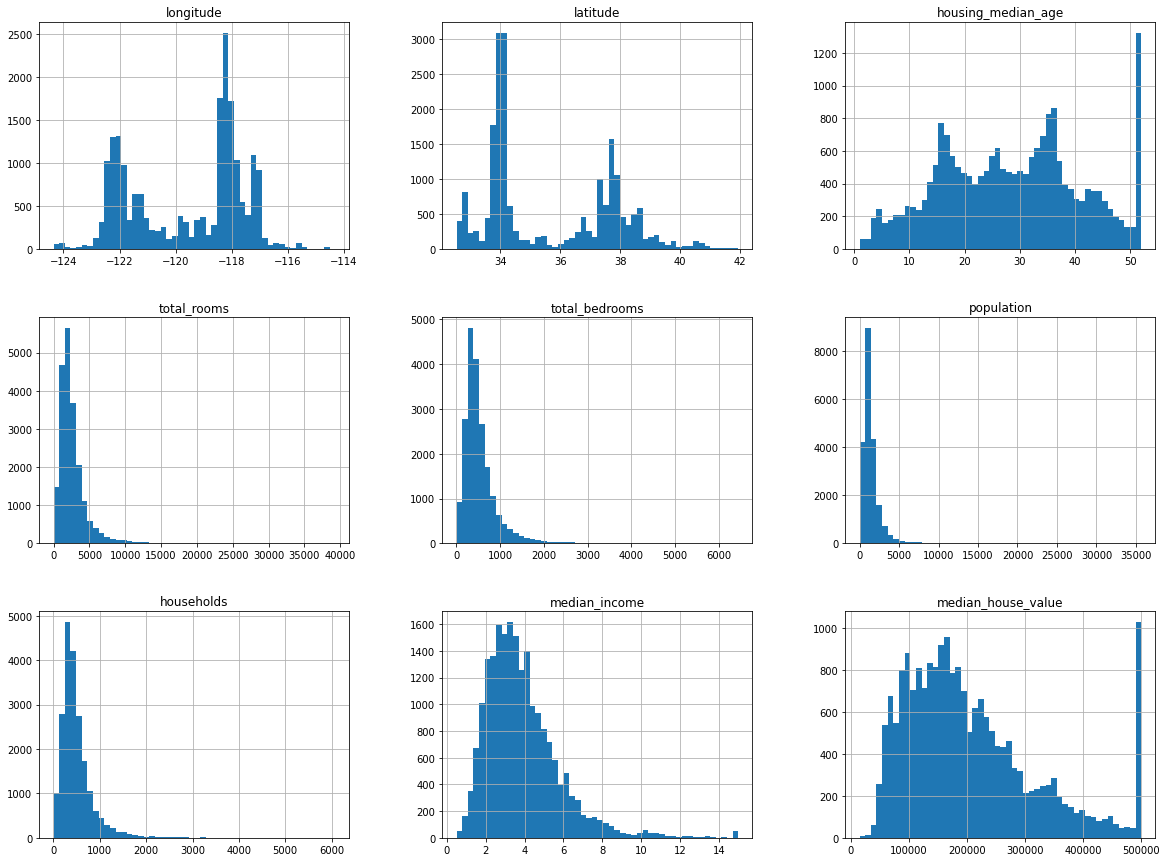

In [9]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [10]:
df.shape

(20640, 10)

In [11]:
np.sum(df["total_bedrooms"].isna())

207

In [12]:
#df = df.dropna(subset=["total_bedrooms"])

In [13]:
df = pd.read_csv("housing.csv")
df_num = df.drop("ocean_proximity", axis = 1)

process_columns = ["total_rooms", "total_bedrooms", "population", "households"]
df_num[process_columns] = np.log(df_num[process_columns])

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, PolynomialFeatures
)

imp = SimpleImputer(missing_values=np.nan, strategy="median")
#imp.fit(df_num)
#imp.statistics_
X = imp.fit_transform(df_num)
df_num = pd.DataFrame(X, columns=df_num.columns)
scale_colums = ["housing_median_age", "total_rooms", "total_bedrooms", 
                "population", "households", "median_income"]


"""minmax_scaler = MinMaxScaler()
minmax_scaler.fit(df_num[scale_colums])
df_num[scale_colums] = minmax_scaler.transform(df_num[scale_colums])"""

scaler = StandardScaler()
scaler.fit(df_num[scale_colums])
df_num[scale_colums] = scaler.transform(df_num[scale_colums])

poly_columns = ["population", "total_bedrooms", "households"]
poly_transform = PolynomialFeatures(3, interaction_only=True)
poly_features = poly_transform.fit_transform(df_num[poly_columns])
for index in range(poly_features.shape[1]):
    df_num[f"Poly_column_{index}"] = poly_features[:, index]
df_num.columns

#df_num.describe()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'Poly_column_0', 'Poly_column_1', 'Poly_column_2',
       'Poly_column_3', 'Poly_column_4', 'Poly_column_5', 'Poly_column_6',
       'Poly_column_7'],
      dtype='object')

In [14]:
#df.drop("ocean_proximity", axis = 1).median().values

In [15]:
#X = imp.transform(df_num)
#df_num = pd.DataFrame(X, columns=df_num.columns)
#df_num.describe()

In [16]:
df_cat = df["ocean_proximity"]
df_cat_encoded, df_categories = df_cat.factorize()
df_cat_encoded

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [17]:
df_categories

Index(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'], dtype='object')

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_cat_1hot = encoder.fit_transform(df_cat_encoded.reshape(-1, 1))
df_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [19]:
if "ocean_proximity" in df.columns:
    df = df.drop("ocean_proximity", axis = 1)
df[df_categories] = df_cat_1hot.toarray()
df[df_num.columns] = df_num

In [20]:
"""
import numpy as np
np.random.seed(42)

def split(dataset, ratio = 0.6):
    shuffle_indices = np.random.permutation(dataset.shape[0])
    train_size = int(dataset.shape[0] * ratio)
    train_indices = shuffle_indices[:train_size]
    test_indices = shuffle_indices[train_size:]
    train_data = dataset.iloc[train_indices]
    test_data = dataset.iloc[test_indices]
    return train_data, test_data

train, test = split(df)
print(train.shape)
print(test.shape)
train.head()
"""

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.4, random_state=42)
train_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,NEAR BAY,...,NEAR OCEAN,ISLAND,Poly_column_0,Poly_column_1,Poly_column_2,Poly_column_3,Poly_column_4,Poly_column_5,Poly_column_6,Poly_column_7
9012,-118.63,34.11,0.505394,0.815500,0.665743,0.410298,0.683131,1.054245,448100.0,0.0,...,0.0,0.0,1.0,0.410298,0.665743,0.683131,0.273153,0.280287,0.454790,0.186599
2769,-115.98,33.32,-1.639974,-2.858133,-3.048557,-3.901092,-3.823396,-1.264292,53800.0,0.0,...,0.0,0.0,1.0,-3.901092,-3.048557,-3.823396,11.892699,14.915418,11.655838,-45.470496
1953,-120.78,38.74,-0.050812,0.961784,0.994668,0.786424,1.091670,-0.900302,111300.0,0.0,...,0.0,0.0,1.0,0.786424,0.994668,1.091670,0.782230,0.858515,1.085849,0.853937
16897,-122.37,37.58,1.141059,0.263288,0.023480,-0.203001,0.106837,0.457806,500001.0,0.0,...,1.0,0.0,1.0,-0.203001,0.023480,0.106837,-0.004766,-0.021688,0.002509,-0.000509
17866,-121.92,37.45,-1.481058,0.864380,1.246819,0.802512,1.267231,-0.320549,252200.0,0.0,...,0.0,0.0,1.0,0.802512,1.246819,1.267231,1.000587,1.016968,1.580008,1.267975


C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

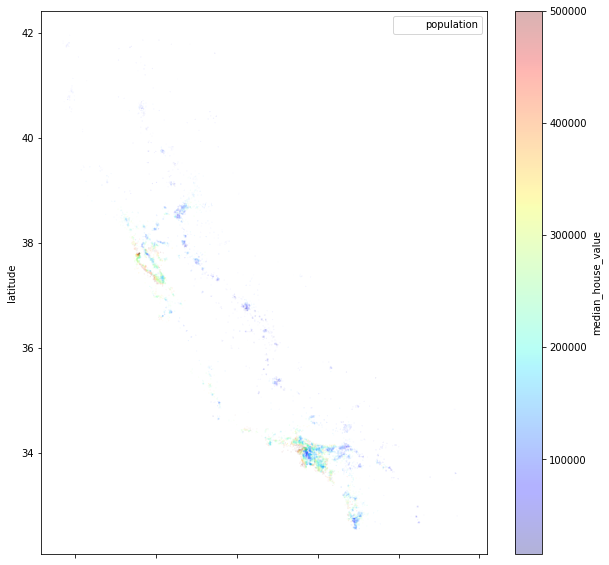

In [21]:
df.plot(kind="scatter", x="longitude", y="latitude", 
        alpha=0.3, s=df["population"]/100, label="population",
        c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
        figsize=(10, 10))

In [22]:
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
<1H OCEAN             0.256617
NEAR BAY              0.160284
total_rooms           0.159227
NEAR OCEAN            0.141862
housing_median_age    0.105623
households            0.073175
Poly_column_3         0.073175
total_bedrooms        0.052675
Poly_column_2         0.052675
ISLAND                0.023416
Poly_column_7         0.004883
Poly_column_6         0.000533
Poly_column_4        -0.000153
Poly_column_5        -0.009122
population           -0.021158
Poly_column_1        -0.021158
longitude            -0.045967
latitude             -0.144160
INLAND               -0.484859
Poly_column_0              NaN
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

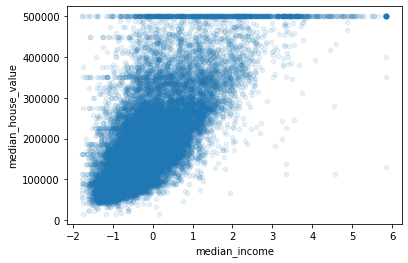

In [23]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [24]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN',
       'ISLAND', 'Poly_column_0', 'Poly_column_1', 'Poly_column_2',
       'Poly_column_3', 'Poly_column_4', 'Poly_column_5', 'Poly_column_6',
       'Poly_column_7'],
      dtype='object')

In [25]:
"""
Xs = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
Ys = ['median_house_value']
"""
Xs = df.drop("median_house_value", axis=1).columns
Ys = ['median_house_value']
Xs


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND',
       'Poly_column_0', 'Poly_column_1', 'Poly_column_2', 'Poly_column_3',
       'Poly_column_4', 'Poly_column_5', 'Poly_column_6', 'Poly_column_7'],
      dtype='object')

In [26]:
train_Xs = train_set[Xs]
train_Ys = train_set[Ys]

test_Xs = test_set[Xs]
test_Ys = test_set[Ys]

In [27]:
def cost(Ys_real, Ys_predict):
    Losses = np.power(Ys_real - Ys_predict, 2)
    m = len(Ys_real)
    cost_result = 1 / (2*m) * np.sum(Losses)
    return cost_result

def MAE(Ys_real, Ys_predict):
    Losses = np.abs(Ys_real - Ys_predict)
    m = len(Ys_real)
    cost_result = 1 / m * np.sum(Losses)
    return cost_result

In [28]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_Xs, train_Ys)
predictions = model.predict(train_Xs)
print("coef:", model.coef_, "; intercept:", model.intercept_)
print("Cost train:", cost(train_Ys, predictions))
print("MAE train:", MAE(train_Ys, predictions))
cost(train_Ys, predictions)

coef: [[-2.97853218e+04 -2.88029577e+04  1.35224183e+04 -3.16336513e+04
   3.60790095e+04 -3.70482247e+04  1.91666437e+04  7.96021204e+04
  -2.61108520e+04 -1.54070178e+04 -4.92430948e+04 -1.89762040e+04
   1.09737169e+05 -8.18545232e-11 -3.70482247e+04  3.60790095e+04
   1.91666437e+04 -7.21613031e+03 -3.38851516e+03  1.13383835e+04
  -9.70622104e+01]] ; intercept: [-2302278.24328316]
Cost train: median_house_value    2.129644e+09
dtype: float64
MAE train: median_house_value    47179.055183
dtype: float64


median_house_value    2.129644e+09
dtype: float64

In [29]:
predictions = model.predict(test_Xs)
print("Cost test:", cost(test_Ys, predictions))
print("MAE test:", MAE(test_Ys, predictions))

Cost test: median_house_value    2.273825e+09
dtype: float64
MAE test: median_house_value    48935.996408
dtype: float64


In [30]:
idx = 2

house = test_Xs.iloc[1]
result = model.predict([house])
print("Predict:", result[0][0])
print("Real:", test_Ys.iloc[idx][0])

Predict: 113490.0637081922
Real: 500001.0
